# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [19]:
cities

['ushuaia',
 'port alfred',
 'puerto ayora',
 'vaini',
 'dikson',
 'leningradskiy',
 'thompson',
 'tsihombe',
 'saint george',
 'kingsville',
 'punta arenas',
 'atuona',
 'palmer',
 'wa',
 'rikitea',
 'ponta do sol',
 'arraial do cabo',
 'sur',
 'iqaluit',
 'isangel',
 'upernavik',
 'beringovskiy',
 'belushya guba',
 'busselton',
 'bethel',
 'fevik',
 'airai',
 'saleaula',
 'jamestown',
 'kodiak',
 'necochea',
 'ust-karsk',
 'mataura',
 'kalmunai',
 'rocha',
 'torbay',
 'avera',
 'kuche',
 'olga',
 'taolanaro',
 'viedma',
 'kyenjojo',
 'alta floresta',
 'laguna',
 'taoudenni',
 'marfino',
 'albany',
 'zhigansk',
 'ostrovnoy',
 'mae sai',
 'lompoc',
 'lillooet',
 'mar del plata',
 'gabu',
 'victoria',
 'avarua',
 'hermanus',
 'samarai',
 'bengkulu',
 'bambous virieux',
 'castro',
 'faanui',
 'northam',
 'hobart',
 'barentsburg',
 'kirakira',
 'kaitangata',
 'corrales',
 'srednekolymsk',
 'mys shmidta',
 'half moon bay',
 'havoysund',
 'ishigaki',
 'prince george',
 'nampula',
 'krasnoar

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Create Cities dataframe with list pulled from citipy
cities_df = pd.DataFrame({'City':cities})
cities_df.head()

,City
0,ushuaia
1,port alfred
2,puerto ayora
3,vaini
4,dikson


In [21]:
#Add columns to df to fill out
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,,,,,,,,
1,port alfred,,,,,,,,
2,puerto ayora,,,,,,,,
3,vaini,,,,,,,,
4,dikson,,,,,,,,


In [22]:
for index, row in cities_df.iterrows():
    print(row['City'])

ushuaia
port alfred
puerto ayora
vaini
dikson
leningradskiy
thompson
tsihombe
saint george
kingsville
punta arenas
atuona
palmer
wa
rikitea
ponta do sol
arraial do cabo
sur
iqaluit
isangel
upernavik
beringovskiy
belushya guba
busselton
bethel
fevik
airai
saleaula
jamestown
kodiak
necochea
ust-karsk
mataura
kalmunai
rocha
torbay
avera
kuche
olga
taolanaro
viedma
kyenjojo
alta floresta
laguna
taoudenni
marfino
albany
zhigansk
ostrovnoy
mae sai
lompoc
lillooet
mar del plata
gabu
victoria
avarua
hermanus
samarai
bengkulu
bambous virieux
castro
faanui
northam
hobart
barentsburg
kirakira
kaitangata
corrales
srednekolymsk
mys shmidta
half moon bay
havoysund
ishigaki
prince george
nampula
krasnoarmeysk
san vicente
kahului
kropotkin
shuangyang
hibbing
hithadhoo
vaitape
nerchinskiy zavod
cherskiy
nabire
zhanaozen
manacapuru
ambilobe
khormuj
acarau
cape town
penzance
la palma
piltene
broome
karratha
conakry
cochrane
beeville
alofi
anadyr
fortuna
turayf
caravelas
pevek
cockburn harbour
sentyabrski

In [23]:
#Build API URL to get data from open weather
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "units": "metric",
    "appid": weather_api_key,
}
#iterrows to iterate through pandas city dataframe
for index, row in cities_df.iterrows():

    #Get city from cities dataframe
    city = row['City']

    #Add q parameter to params dict
    params['q'] = city

    #Build url and API request
    print(f"Processing record {index}: {city}.")
    response = requests.get(base_url, params=params).json()
    
    try:
        #Fill out cities df with data from API
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except (KeyError, IndexError):
        print("Missing result, skipping.")
        
    print("------------")

Processing record 0: ushuaia.
------------
Processing record 1: port alfred.
------------
Processing record 2: puerto ayora.
------------
Processing record 3: vaini.
------------
Processing record 4: dikson.
------------
Processing record 5: leningradskiy.
------------
Processing record 6: thompson.
------------
Processing record 7: tsihombe.
Missing result, skipping.
------------
Processing record 8: saint george.
------------
Processing record 9: kingsville.
------------
Processing record 10: punta arenas.
------------
Processing record 11: atuona.
------------
Processing record 12: palmer.
------------
Processing record 13: wa.
Missing result, skipping.
------------
Processing record 14: rikitea.
------------
Processing record 15: ponta do sol.
------------
Processing record 16: arraial do cabo.
------------
Processing record 17: sur.
------------
Processing record 18: iqaluit.
------------
Processing record 19: isangel.
------------
Processing record 20: upernavik.
------------
Pro

------------
Processing record 171: dauphin.
------------
Processing record 172: sabla.
------------
Processing record 173: shimoda.
------------
Processing record 174: hirara.
------------
Processing record 175: tasiilaq.
------------
Processing record 176: attawapiskat.
Missing result, skipping.
------------
Processing record 177: barrow.
------------
Processing record 178: kyshtovka.
------------
Processing record 179: brae.
------------
Processing record 180: khani.
------------
Processing record 181: bandarbeyla.
------------
Processing record 182: podor.
------------
Processing record 183: illoqqortoormiut.
Missing result, skipping.
------------
Processing record 184: ust-omchug.
------------
Processing record 185: oranjestad.
------------
Processing record 186: krasnoselkup.
------------
Processing record 187: vila franca do campo.
------------
Processing record 188: luanda.
------------
Processing record 189: port elizabeth.
------------
Processing record 190: sidney.
---------

------------
Processing record 343: ulladulla.
------------
Processing record 344: coos bay.
------------
Processing record 345: kajaani.
------------
Processing record 346: port hardy.
------------
Processing record 347: yei.
------------
Processing record 348: mount pleasant.
------------
Processing record 349: nantucket.
------------
Processing record 350: vanimo.
------------
Processing record 351: harrismith.
------------
Processing record 352: sembakung.
------------
Processing record 353: tandil.
------------
Processing record 354: carbonear.
------------
Processing record 355: chuchkovo.
------------
Processing record 356: yulara.
------------
Processing record 357: illapel.
------------
Processing record 358: lorengau.
------------
Processing record 359: bhum.
------------
Processing record 360: mmathubudukwane.
------------
Processing record 361: grass valley.
------------
Processing record 362: uhlove.
------------
Processing record 363: teeli.
------------
Processing record

------------
Processing record 511: camana.
------------
Processing record 512: petropavlovsk-kamchatskiy.
------------
Processing record 513: mogok.
------------
Processing record 514: galle.
------------
Processing record 515: sioux falls.
------------
Processing record 516: nizhnevartovsk.
------------
Processing record 517: guane.
------------
Processing record 518: abashiri.
------------
Processing record 519: ratnagiri.
------------
Processing record 520: rjukan.
------------
Processing record 521: khorramshahr.
------------
Processing record 522: helden.
------------
Processing record 523: meulaboh.
------------
Processing record 524: iskitim.
------------
Processing record 525: lashio.
------------
Processing record 526: seymchan.
------------
Processing record 527: hobyo.
------------
Processing record 528: qui nhon.
------------
Processing record 529: kurlovo.
------------
Processing record 530: rabak.
------------
Processing record 531: north branch.
------------
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Remove records with no data
cities_df=cities_df.loc[cities_df['Country']!='']

#Export clean cities df to CSV
cities_df.to_csv(output_data_file, index=True, index_label='City_ID')

In [25]:
#Display cities df
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1603289975,42,-54.8,-68.3,9,10.3
1,port alfred,0,ZA,1603290014,58,-33.59,26.89,20.61,7.75
2,puerto ayora,90,EC,1603289763,91,-0.74,-90.35,20.56,2.68
3,vaini,75,TO,1603289747,78,-21.2,-175.2,22,4.1
4,dikson,98,RU,1603290068,98,73.51,80.55,-4.58,1.68
...,...,...,...,...,...,...,...,...,...
595,ramnagar,0,IN,1603290667,50,29.4,79.12,20.72,1.95
596,angoram,95,PG,1603290668,95,-4.06,144.07,23.66,0.14
597,san policarpo,100,PH,1603290126,86,12.18,125.51,27.32,4.37
598,ereymentau,65,KZ,1603290668,44,51.62,73.1,9.9,7.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

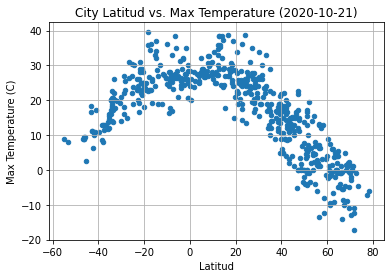

In [58]:
cities_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True)
plt.title(f"City Latitud vs. Max Temperature ({datetime.date.today()})")
plt.xlabel("Latitud")
plt.ylabel("Max Temperature (C)")
plt.show()

#### City Latitud vs Max Temperature Observations:
- First
- Second

#### Latitude vs. Humidity Plot

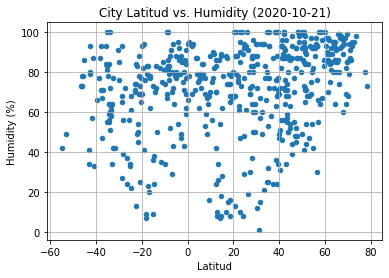

In [59]:
cities_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True)
plt.title(f"City Latitud vs. Humidity ({datetime.date.today()})")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")
plt.show()

#### City Latitud vs Humidity Observations:
- First
- Second

#### Latitude vs. Cloudiness Plot

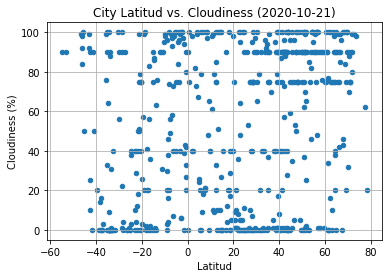

In [60]:
cities_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True)
plt.title(f"City Latitud vs. Cloudiness ({datetime.date.today()})")
plt.xlabel("Latitud")
plt.ylabel("Cloudiness (%)")
plt.show()

#### City Latitud vs Cloudiness Observations:
- First
- Second

#### Latitude vs. Wind Speed Plot

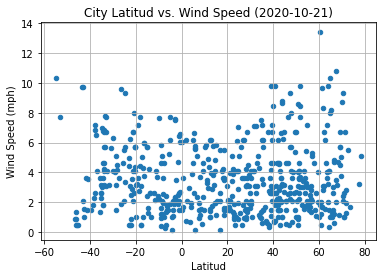

In [61]:
cities_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True)
plt.title(f"City Latitud vs. Wind Speed ({datetime.date.today()})")
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")
plt.show()

#### City Latitud vs Wind Speed Observations:
- First
- Second

## Linear Regression

In [126]:
# OPTIONAL: Create a function to create Linear Regression plots

#Create function for scatter plotter, passing x,y series and annotation location (x,y)
def linearPlot(x_series,y_series, x_ann, y_ann):
    #Assign x y values
    x_values = pd.to_numeric(x_series)
    y_values = pd.to_numeric(y_series)
    #Do calculations
    #Calculate linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create plot
    plt.scatter(x_values,y_values, color='green')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red")
    plt.xlabel('Latitud')
    plt.ylabel(y_values.name)
    print(f"The r-squared is: {rvalue**2}")
    #plt.title(f'Latitud vs. {y_values.name}')
    plt.show()

In [127]:
# Create Northern and Southern Hemisphere DataFrames
#Nothern df
n_cities_df=cities_df.loc[cities_df['Lat'] >= 0]
#Southern df
s_cities_df=cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7706363185152204


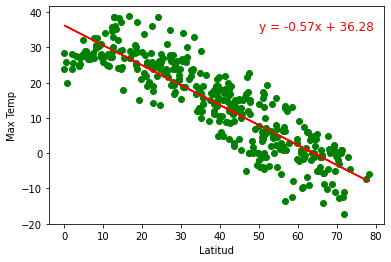

In [128]:
linearPlot(n_cities_df['Lat'],n_cities_df['Max Temp'],50,35)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5338811489477371


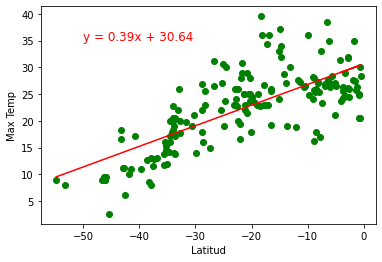

In [129]:
linearPlot(s_cities_df['Lat'],s_cities_df['Max Temp'],-50,35)

### Observations by Hemisphere - Max Temp vs. Latitude:
- First
- Second

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09132975011963722


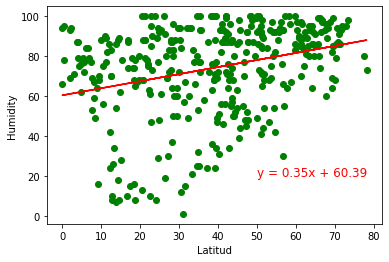

In [130]:
linearPlot(n_cities_df['Lat'],n_cities_df['Humidity'],50,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015088030423457837


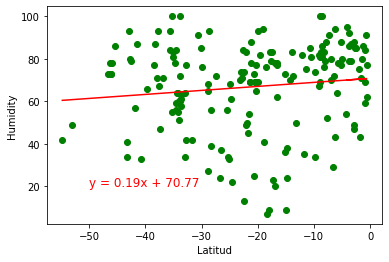

In [131]:
linearPlot(s_cities_df['Lat'],s_cities_df['Humidity'],-50,20)

### Observations by Hemisphere - Humidity (%) vs. Latitude:
- First
- Second

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06626244516068412


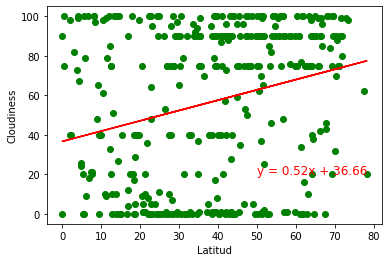

In [132]:
linearPlot(n_cities_df['Lat'],n_cities_df['Cloudiness'],50,20)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02230611175130099


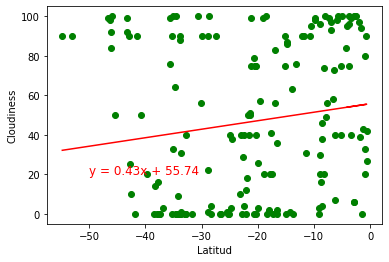

In [133]:
linearPlot(s_cities_df['Lat'],s_cities_df['Cloudiness'],-50,20)

### Observations by Hemisphere - Cloudiness (%) vs. Latitude:
- First
- Second

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015095193391017236


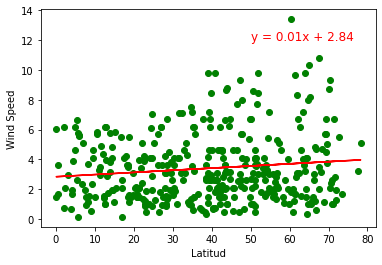

In [134]:
linearPlot(n_cities_df['Lat'],n_cities_df['Wind Speed'],50,12)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03124916971075295


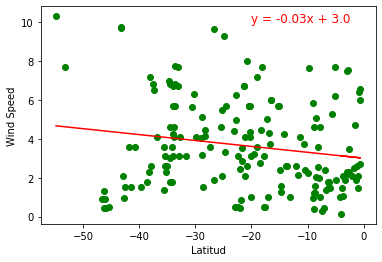

In [135]:
linearPlot(s_cities_df['Lat'],s_cities_df['Wind Speed'],-20,10)

### Observations by Hemisphere - Wind Speed vs. Latitude:
- First
- Second